We want to do a few toy cases for KDE mirroring to make sure we can actually implement this. First, we'll try a simple 1d case then move to a more advanced 2d case

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1D Case

1.0000000000000004


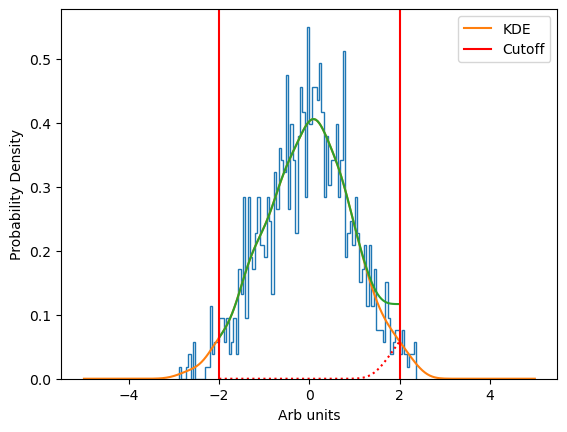

In [36]:
samples = np.random.normal(size=1000)
bins = 100

vals, bins = np.histogram(samples, bins=bins, density=True)
# now let's do the kde
kde = stats.gaussian_kde(samples)
print(np.sum(vals @ np.diff(bins)))

bin_centers = (bins[:-1]+bins[1:])/2
# want to continue the KDE out to a point
large_domain = np.hstack((
    np.linspace(-5, np.min(bin_centers)),
    bin_centers,
    np.linspace(np.max(bin_centers), 5)
))

plt.figure()
plt.hist(samples, bins=100, histtype='step', density=True)
# plt.plot(bin_centers, vals)

plt.plot(large_domain, kde(large_domain), label='KDE')

# now get the partial KDE over the domain (2, 4) and plot
mirrored_kde = kde(np.linspace(2,6, 100))[::-1]
plt.plot(
    np.linspace(-2, 2, 100),
    mirrored_kde,
    color='red',
    linestyle=':'
)
plt.plot(np.linspace(-2, 2, 100), kde(np.linspace(-2, 2, 100))+mirrored_kde)
plt.axvline(-2, color='red', label='Cutoff')
plt.axvline(2, color='red')
plt.ylabel('Probability Density')
plt.xlabel('Arb units')
plt.legend()
plt.show()